In [ ]:
# Asegurar la instalación de paquetes necesarios
using Pkg
packages = [
    "CSV", 
    "Distributions", 
    "DataFrames", 
    "Dates", 
    "Plots", 
    "Random", 
    "LinearAlgebra", 
    "LaTeXStrings", 
    "Lasso", 
    "GLMNet", 
    "HDMjl", 
    "StatsModels", 
    "DecisionTree", 
    "Statistics", 
    "GraphPlot",
    "MLJScikitLearnInterface",
    "MLJ",
    "MLJModels"
]

for pkg in packages
    Pkg.add(pkg)
end

# Cargar los paquetes necesarios
using CSV
using Distributions
using DataFrames
using Dates
using Plots
using Random
using LinearAlgebra
using LaTeXStrings
using Lasso
using GLMNet
using HDMjl
using StatsModels
using DecisionTree
using MLJ
using MLJModels
using MLJScikitLearnInterface
using Statistics

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.to

# Pregunta 1

1.1.

In [7]:
data = CSV.read(
    download("https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/Labs/Assignment/Assignment_5/data/experimental/experimental_control.csv"),
    DataFrame
)

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,37,11,1,0,1,1,0.0,0.0,9930.05
2,1,22,9,0,1,0,1,0.0,0.0,3595.89
3,1,30,12,1,0,0,0,0.0,0.0,24909.4
4,1,27,11,1,0,0,1,0.0,0.0,7506.15
5,1,33,8,1,0,0,1,0.0,0.0,289.79
6,1,22,9,1,0,0,1,0.0,0.0,4056.49
7,1,23,12,1,0,0,0,0.0,0.0,0.0
8,1,32,11,1,0,0,1,0.0,0.0,8472.16
9,1,22,16,1,0,0,0,0.0,0.0,2164.02


1.2.

In [8]:
treated = data[data.treat .== 1, :]  # Filtramos las filas donde treat == 1 el cual es el grupo de tratamiento. 
control = data[data.treat .== 0, :]  # Filtramos las filas donde treat == 0, este representa el grupo de control.

# Calculamos el promedio de nuestra variable de interés, el igreso en 1978.
mean_treated = mean(treated.re78)  # Promedio de ingresos en el grupo tratado
mean_control = mean(control.re78)  # Promedio de ingresos en el grupo control

# Se calcula el ATE (Diferencia de medias).
ATE = mean_treated - mean_control  # Efecto Promedio del Tratamiento

# Resultados:
println("Promedio grupo tratado (re78): ", mean_treated)
println("Promedio grupo control (re78): ", mean_control)
println("Efecto Promedio del Tratamiento (ATE): ", ATE)

Promedio grupo tratado (re78): 6349.143502065298
Promedio grupo control (re78): 4554.801120215196
Efecto Promedio del Tratamiento (ATE): 1794.3423818501024


El ATE positivo de 1794.34 implica que, en promedio, los ingresos del grupo tratado (quienes participaron en el programa de soporte de trabajo) fueron $1794.34 mayores que los del grupo de control (quienes no participaron). Esto sugiere que el programa tuvo un impacto positivo en los ingresos de los participantes en 1978 (re78), lo que podría significar que el programa fue efectivo en mejorar las habilidades laborales, aumentar el acceso a oportunidades de trabajo, o proporcionar mejores empleos. 

Si consideramos que el grupo de control es representativo de lo que les habría ocurrido a los tratados sin el programa, entonces esta diferencia se puede atribuir causalmente al programa (asumiendo un diseño experimental adecuado).

1.3.

In [58]:
using MLJ
using MLJModels

# Coerción de variables categóricas a Multiclass
coerce!(data, :black => Multiclass,
            :hisp => Multiclass,
            :marr => Multiclass,
            :nodegree => Multiclass,
            :treat => Multiclass)

# Separar características (X) y la variable objetivo (D)
D, X = unpack(data, ==(:treat), !=(:treat))

# Codificación One-Hot
OneHotEncoderModel = @load OneHotEncoder pkg=MLJModels verbosity=0
ohe = OneHotEncoderModel()
ohe_machine = machine(ohe, X)
MLJ.fit!(ohe_machine)
X_encoded = MLJ.transform(ohe_machine, X)

# Limpieza y corrección de columnas problemáticas
for name in names(X_encoded)
    # Verificar si la columna contiene `Count` y convertirla a `Float64`
    if scitype(X_encoded[!, name]) == Count
        X_encoded[!, name] = float.(X_encoded[!, name])
    end
    # Extraer probabilidades explícitas si la columna contiene `UnivariateFinite`
    if eltype(X_encoded[!, name]) <: UnivariateFinite
        X_encoded[!, name] = [pdf(val, 1) for val in X_encoded[!, name]]
    end
end

# Verificar tipos científicos de las columnas después de la limpieza
println("Tipos corregidos en X_encoded:")
for col in eachcol(X_encoded)
    println("Columna: ", eltype(col), " | Scitype: ", scitype(col))
end

# Asegurar que los valores faltantes sean reemplazados
X_cleaned = coalesce.(X_encoded, 0.0)  # Reemplazar valores `missing` por 0.0

# Modelo de clasificación logística
LogisticClassifierModel = @load LogisticClassifier pkg=MLJScikitLearnInterface verbosity=0
log_model = LogisticClassifierModel(solver="liblinear")  # Usar un solver robusto para datasets pequeños

# Entrenar el modelo
log_machine = machine(log_model, X_cleaned, D, scitype_check_level=0)
MLJ.fit!(log_machine)

# Predecir puntajes de propensión como distribuciones de probabilidad
predictions = MLJ.predict(log_machine, X_cleaned)

# Extraer probabilidades de la clase positiva (treat = 1)
propensity_scores = [pdf(p, 1) for p in predictions]

# Agregar los puntajes de propensión al DataFrame original
data[!, :propensity_score] = propensity_scores

# Confirmar que los puntajes de propensión se agregaron correctamente
println("Propensity scores agregados al DataFrame:")
println(data[!, :propensity_score])

┌ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
└ @ MLJBase /Users/diegogilore/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Spawning 2 sub-features to one-hot encode feature :black.
└ @ MLJModels /Users/diegogilore/.julia/packages/MLJModels/ziReN/src/builtins/Transformers.jl:878
┌ Info: Spawning 2 sub-features to one-hot encode feature :hisp.
└ @ MLJModels /Users/diegogilore/.julia/packages/MLJModels/ziReN/src/builtins/Transformers.jl:878
┌ Info: Spawning 2 sub-features to one-hot encode feature :marr.
└ @ MLJModels /Users/diegogilore/.julia/packages/MLJModels/ziReN/src/builtins/Transformers.jl:878
┌ Info: Spawning 2 sub-features to one-hot encode feature :nodegree.
└ @ MLJModels /Users/diegogilore/.julia/packages/MLJModels/ziReN/src/builtins/Transformers.jl:878


Tipos corregidos en X_encoded:
Columna: Int64 | Scitype: AbstractVector{Count}
Columna: Int64 | Scitype: AbstractVector{Count}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{Scien

┌ Info: Training machine(LogisticClassifier(penalty = l2, …), …).
└ @ MLJBase /Users/diegogilore/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
/Users/diegogilore/.julia/environments/v1.10/.CondaPkg/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Propensity scores agregados al DataFrame:
[0.4650255968271925, 0.252069040057965, 0.7409716849380469, 0.3882836443011665, 0.3626549324163947, 0.37076845938158476, 0.4983772905011429, 0.4052605191330787, 0.4700129110176469, 0.6425122093677712, 0.40605516817472254, 0.6520452581010582, 0.3383996240761643, 0.5509044847249593, 0.3763788393860015, 0.3474307487534842, 0.6373179548117366, 0.3957064630307478, 0.6320463471654887, 0.6106820417208753, 0.3132235310186189, 0.5226947691094314, 0.3868545543274036, 0.33229297121823054, 0.422202181950416, 0.44956483363845917, 0.4085768421047396, 0.3103574496997059, 0.4714847071373487, 0.3233738739371615, 0.31556094385907957, 0.4953347486117236, 0.36443716241397595, 0.49363202148050334, 0.5339931599107169, 0.7006922263230455, 0.4432200370612216, 0.5955074643211725, 0.44644074709654386, 0.3251853989750924, 0.507989734596201, 0.42441658476451993, 0.41369943684386656, 0.27990060868488204, 0.3446718517592161, 0.34973802383371166, 0.336986615282561, 0.3261812

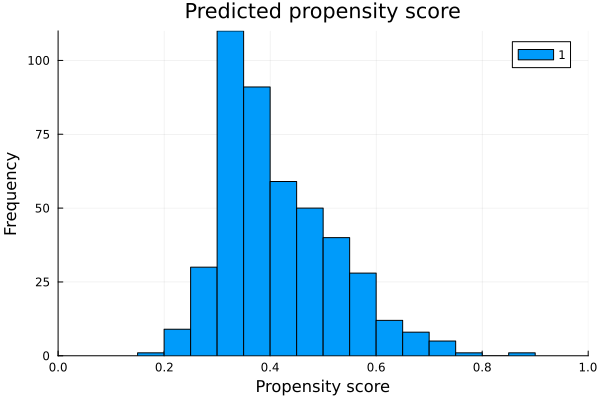

In [60]:
using Plots

histogram(propensity_scores, bins=30, title="Predicted propensity score", label = "1",
         xlabel="Propensity score", ylabel="Frequency",xlims=(0, 1))

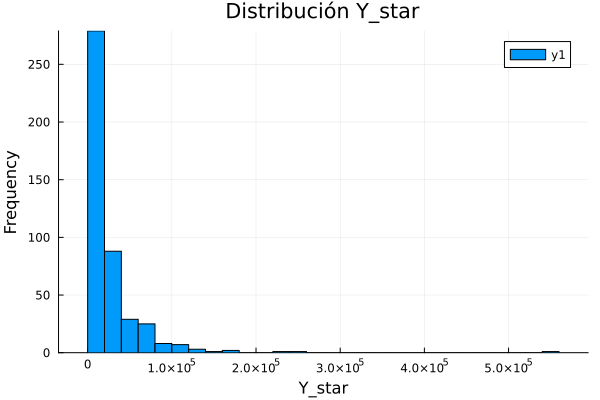

In [87]:
y, X = unpack(data, ==(:re78), !=(:re78))
Y = y
D_continuo = coerce(D, MLJ.Continuous)
# Compute Y_star
Y_star = (Y .* D_continuo) ./ propensity_scores .- (Y .* (1 .- D_continuo)) ./ (1 .- propensity_scores)

# Add Y_star to the DataFrame
data.Y_star = Y_star
histogram(Y_star, bins=50, title="Distribución Y_star", xlabel="Y_star", ylabel="Frequency")

In [103]:
tree_regressor = @load DecisionTreeRegressor pkg=DecisionTree verbosity=0
tree_model = tree_regressor(max_depth=3)
tree_machine = machine(tree_model, X_encoded, Y_star)
MLJ.fit!(tree_machine)
fitted_params(tree_machine)[1]

┌ Info: Training machine(DecisionTreeRegressor(max_depth = 3, …), …).
└ @ MLJBase /Users/diegogilore/.julia/packages/MLJBase/7nGJF/src/machines.jl:499


re78 < 21550.0
├─ re78 < 6104.0
│  ├─ re78 < 2257.0
│  │  ├─ 1748.4844006216695 (0/196)
│  │  └─ 17824.246253254176 (0/93)
│  └─ re78 < 17050.0
│     ├─ 41022.55348840463 (0/135)
│     └─ 86417.9947816941 (0/12)
└─ 206899.22743740873 (0/9)


1.4

In [106]:
forest_regressor = @load RandomForestRegressor pkg=DecisionTree verbosity=0
forest_model = forest_regressor(n_trees=100, max_depth=10)

forest_machine = machine(forest_model, X_encoded, Y_star)
MLJ.fit!(forest_machine)

# feature importance
importance = feature_importances(forest_machine)

println("Importancia de las características:")
for (var, imp) in zip(names(X_encoded), importance)
    println("$var: $imp")
end

┌ Info: Training machine(RandomForestRegressor(max_depth = 10, …), …).
└ @ MLJBase /Users/diegogilore/.julia/packages/MLJBase/7nGJF/src/machines.jl:499


Importancia de las características:
age: :re78 => 0.45771494822792014
educ: :propensity_score => 0.3481596804230858
black__0: :educ => 0.04044778387166477
black__1: :re75 => 0.039875540365019724
hisp__0: :age => 0.03628929548570017
hisp__1: :re74 => 0.026589913186699555
marr__0: :nodegree__0 => 0.010617861414548268
marr__1: :nodegree__1 => 0.0074411491512713125
nodegree__0: :black__1 => 0.007269878512653079
nodegree__1: :marr__1 => 0.006260643152613892
re74: :black__0 => 0.005602327490233924
re75: :marr__0 => 0.004795976725840751
re78: :hisp__1 => 0.00461672444204751
propensity_score: :hisp__0 => 0.004318277550701129


1.5.

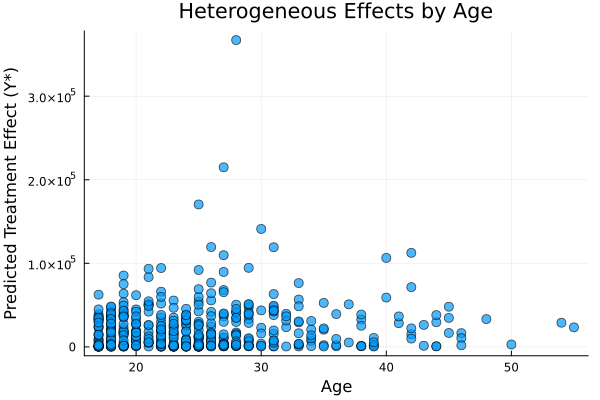

In [108]:
using Plots

# Variable seleccionada: age
selected_variable = :age

# Extraer valores de la variable seleccionada
age_values = X_encoded[!, selected_variable]

# Generar predicciones usando el modelo ajustado
predicted_effects = MLJ.predict(forest_machine, X_encoded)

# Crear el gráfico
scatter(age_values, predicted_effects, 
        xlabel="Age", 
        ylabel="Predicted Treatment Effect (Y*)", 
        title="Heterogeneous Effects by Age",
        legend=false, 
        alpha=0.7, 
        markersize=5)